In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#df = pd.read_csv('../Data/Project_2_data.csv')
df = pd.read_csv('../../../Data/ATP_108_Original_csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10282 entries, 0 to 10281
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ENV2_a_W108          10282 non-null  int64  
 1   ENV2_b_W108          10282 non-null  int64  
 2   ENKNOW1_W108         10282 non-null  int64  
 3   ENKNOW2_W108         10282 non-null  int64  
 4   EN1_W108             10282 non-null  int64  
 5   EVCAR2_W108          10282 non-null  int64  
 6   EVCAR2B_a_W108       4481 non-null   float64
 7   EVCAR2B_b_W108       4481 non-null   float64
 8   EVCAR2B_c_W108       4481 non-null   float64
 9   EVCAR3_W108          10282 non-null  int64  
 10  EVCAR1_W108          10282 non-null  int64  
 11  ENVIR8_a_W108        10282 non-null  int64  
 12  ENVIR8_b_W108        10282 non-null  int64  
 13  ENVIR8_c_W108        10282 non-null  int64  
 14  ENVIR8_d_W108        10282 non-null  int64  
 15  ENVIR8_e_W108        10282 non-null 

In [4]:
# look at data frame
df.head()

ENV2_a_W108  ENV2_b_W108  ENKNOW1_W108  ENKNOW2_W108  EN1_W108  \
0            1            1             1             1         2   
1            2            1             1             1         1   
2            1            1             2             1         1   
3            2            2             3             1         1   
4            1            1             2             1         2   

   EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  EVCAR3_W108  \
0            2             2.0             3.0             1.0            2   
1            2             2.0             2.0             2.0            1   
2            2             2.0             3.0             2.0            2   
3            2             1.0             1.0             3.0            1   
4            3             NaN             NaN             NaN            2   

   ...  F_METRO  F_CREGION  F_AGECAT  F_GENDER  F_EDUCCAT  F_RACETHNMOD  \
0  ...        1          4         4         1          1             1   
1  ...        2          2         4         1          2             1   
2  ...        1          1         2         2          1             1   
3  ...        1          4         3         2          1             1   
4  ...        1          3         4         2          2             1   

   F_PARTYSUM_FINAL  F_INC_SDT1  F_IDEO  F_INTFREQ  
0                 1           4       1        2.0  
1                 1           3       4        2.0  
2                 2           9       3        2.0  
3                 1           9       2        2.0  
4                 1           2       1        5.0  

[5 rows x 57 columns]

In [5]:
# list name of columns
print(df.columns.tolist())

['ENV2_a_W108', 'ENV2_b_W108', 'ENKNOW1_W108', 'ENKNOW2_W108', 'EN1_W108', 'EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108', 'EVCAR3_W108', 'EVCAR1_W108', 'ENVIR8_a_W108', 'ENVIR8_b_W108', 'ENVIR8_c_W108', 'ENVIR8_d_W108', 'ENVIR8_e_W108', 'LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108', 'ENVRMPCT_a_W108', 'ENVRMPCT_b_W108', 'ENVRMPCT_c_W108', 'ENVRMPCT_d_W108', 'ENVRMPCT_e_W108', 'CCXTRW1_a_W108', 'CCXTRW1_b_W108', 'CCXTRW1_c_W108', 'CCXTRW1_d_W108', 'CCXTRW1_e_W108', 'CCPOLICY_e_W108', 'BIDENC4_W108', 'BIDENC5_W108', 'CVDPRIORTY_a_W108', 'CVDPRIORTY_b_W108', 'CVDPRIORTY_c_W108', 'CVDPRIORTY_d_W108', 'CVDPRIORTY_e_W108', 'CVDPRIORTY_f_W108', 'RSTCWRK_a_W108', 'RSTCWRK_b_W108', 'RSTCWRK_c_W108', 'RSTCWRK_d_W108', 'RSTCWRK_e_W108', 'COVID_INFECT_a_W108', 'COVID_INFECT_b_W108', 'GAP21Q12_W108', 'F_MARITAL', 'F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_RACETHNMOD', 'F_PARTYSUM_FINAL', 'F_INC_SDT1', 'F_IDEO', 'F_INTFREQ']


In [6]:
# determine # of nulls
df.isnull().sum()

ENV2_a_W108               0
ENV2_b_W108               0
ENKNOW1_W108              0
ENKNOW2_W108              0
EN1_W108                  0
EVCAR2_W108               0
EVCAR2B_a_W108         5801
EVCAR2B_b_W108         5801
EVCAR2B_c_W108         5801
EVCAR3_W108               0
EVCAR1_W108               0
ENVIR8_a_W108             0
ENVIR8_b_W108             0
ENVIR8_c_W108             0
ENVIR8_d_W108             0
ENVIR8_e_W108             0
LOCENV_a_W108             0
LOCENV_d_W108             0
LOCENV_e_W108             0
ENVRMPCT_a_W108           0
ENVRMPCT_b_W108           0
ENVRMPCT_c_W108           0
ENVRMPCT_d_W108           0
ENVRMPCT_e_W108           0
CCXTRW1_a_W108         7074
CCXTRW1_b_W108         6005
CCXTRW1_c_W108         5911
CCXTRW1_d_W108         8658
CCXTRW1_e_W108         8234
CCPOLICY_e_W108           0
BIDENC4_W108              0
BIDENC5_W108           5276
CVDPRIORTY_a_W108         0
CVDPRIORTY_b_W108         0
CVDPRIORTY_c_W108         0
CVDPRIORTY_d_W108   

In [7]:
#search for keys containing ENV
df.filter(like='ENV').columns

Index(['ENV2_a_W108', 'ENV2_b_W108', 'ENVIR8_a_W108', 'ENVIR8_b_W108',
       'ENVIR8_c_W108', 'ENVIR8_d_W108', 'ENVIR8_e_W108', 'LOCENV_a_W108',
       'LOCENV_d_W108', 'LOCENV_e_W108', 'ENVRMPCT_a_W108', 'ENVRMPCT_b_W108',
       'ENVRMPCT_c_W108', 'ENVRMPCT_d_W108', 'ENVRMPCT_e_W108'],
      dtype='object')

In [8]:
subset_df = df[['ENV2_a_W108', 'ENV2_b_W108', 'ENKNOW1_W108', 'ENKNOW2_W108', 'EN1_W108',
                'ENVIR8_a_W108', 'ENVIR8_b_W108', 'ENVIR8_c_W108', 'ENVIR8_d_W108', 'ENVIR8_e_W108', 
                'LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108', 'ENVRMPCT_a_W108', 'ENVRMPCT_b_W108', 
                'ENVRMPCT_c_W108', 'ENVRMPCT_d_W108', 'ENVRMPCT_e_W108',
                'EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
                'EVCAR3_W108', 'EVCAR1_W108','F_MARITAL', 'F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER',
                'F_EDUCCAT', 'F_RACETHNMOD', 'F_PARTYSUM_FINAL',"ENVRMPCT_a_W108","ENVRMPCT_b_W108",
                "ENVRMPCT_c_W108","ENVRMPCT_d_W108","ENVRMPCT_e_W108"]].copy()

subset_df.head()

ENV2_a_W108  ENV2_b_W108  ENKNOW1_W108  ENKNOW2_W108  EN1_W108  \
0            1            1             1             1         2   
1            2            1             1             1         1   
2            1            1             2             1         1   
3            2            2             3             1         1   
4            1            1             2             1         2   

   ENVIR8_a_W108  ENVIR8_b_W108  ENVIR8_c_W108  ENVIR8_d_W108  ENVIR8_e_W108  \
0              2              2              1              1              1   
1              2              2              2              2              3   
2              2              3              3              3              3   
3              2              2              2              3              2   
4              1              2              2              2              1   

   ...  F_AGECAT  F_GENDER  F_EDUCCAT  F_RACETHNMOD  F_PARTYSUM_FINAL  \
0  ...         4         1          1             1                 1   
1  ...         4         1          2             1                 1   
2  ...         2         2          1             1                 2   
3  ...         3         2          1             1                 1   
4  ...         4         2          2             1                 1   

   ENVRMPCT_a_W108  ENVRMPCT_b_W108  ENVRMPCT_c_W108  ENVRMPCT_d_W108  \
0                1                2                2                2   
1                2                2                2                2   
2                2                2                2                2   
3                1                2                2                2   
4                2                2                2                2   

   ENVRMPCT_e_W108  
0                2  
1                2  
2                2  
3                1  
4                2  

[5 rows x 37 columns]

In [9]:
# list name of columns in subset dataframe
print(df.columns.tolist())

['ENV2_a_W108', 'ENV2_b_W108', 'ENKNOW1_W108', 'ENKNOW2_W108', 'EN1_W108', 'EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108', 'EVCAR3_W108', 'EVCAR1_W108', 'ENVIR8_a_W108', 'ENVIR8_b_W108', 'ENVIR8_c_W108', 'ENVIR8_d_W108', 'ENVIR8_e_W108', 'LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108', 'ENVRMPCT_a_W108', 'ENVRMPCT_b_W108', 'ENVRMPCT_c_W108', 'ENVRMPCT_d_W108', 'ENVRMPCT_e_W108', 'CCXTRW1_a_W108', 'CCXTRW1_b_W108', 'CCXTRW1_c_W108', 'CCXTRW1_d_W108', 'CCXTRW1_e_W108', 'CCPOLICY_e_W108', 'BIDENC4_W108', 'BIDENC5_W108', 'CVDPRIORTY_a_W108', 'CVDPRIORTY_b_W108', 'CVDPRIORTY_c_W108', 'CVDPRIORTY_d_W108', 'CVDPRIORTY_e_W108', 'CVDPRIORTY_f_W108', 'RSTCWRK_a_W108', 'RSTCWRK_b_W108', 'RSTCWRK_c_W108', 'RSTCWRK_d_W108', 'RSTCWRK_e_W108', 'COVID_INFECT_a_W108', 'COVID_INFECT_b_W108', 'GAP21Q12_W108', 'F_MARITAL', 'F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_RACETHNMOD', 'F_PARTYSUM_FINAL', 'F_INC_SDT1', 'F_IDEO', 'F_INTFREQ']


In [10]:
# droping columns that results in results of most data
subset_df = df.drop(columns=['CCPOLICY_e_W108', 'BIDENC4_W108', 'BIDENC5_W108', 'CVDPRIORTY_a_W108', 
                             'CVDPRIORTY_b_W108', 'CVDPRIORTY_c_W108', 'CVDPRIORTY_d_W108', 'CVDPRIORTY_e_W108', 
                             'CVDPRIORTY_f_W108','COVID_INFECT_a_W108', 'COVID_INFECT_b_W108','CCXTRW1_a_W108', 
                             'CCXTRW1_b_W108', 'CCXTRW1_c_W108', 'CCXTRW1_d_W108', 'CCXTRW1_e_W108',
                            'RSTCWRK_a_W108', 'RSTCWRK_b_W108', 'RSTCWRK_c_W108', 'RSTCWRK_d_W108', 'RSTCWRK_e_W108',])

In [11]:
# set no answers to null to drop
subset_df[:] = np.where(subset_df == 99, np.nan, subset_df)
# drop null
subset_df.dropna(inplace = True)
#reset index
subset_df.reset_index()
# examine dataframe
subset_df.head()

ENV2_a_W108  ENV2_b_W108  ENKNOW1_W108  ENKNOW2_W108  EN1_W108  \
0           1.0          1.0           1.0           1.0       2.0   
1           2.0          1.0           1.0           1.0       1.0   
2           1.0          1.0           2.0           1.0       1.0   
3           2.0          2.0           3.0           1.0       1.0   
13          2.0          2.0           1.0           1.0       1.0   

    EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  EVCAR3_W108  \
0           2.0             2.0             3.0             1.0          2.0   
1           2.0             2.0             2.0             2.0          1.0   
2           2.0             2.0             3.0             2.0          2.0   
3           2.0             1.0             1.0             3.0          1.0   
13          1.0             1.0             1.0             2.0          1.0   

    ...  F_METRO  F_CREGION  F_AGECAT  F_GENDER  F_EDUCCAT  F_RACETHNMOD  \
0   ...        1          4       4.0       1.0        1.0           1.0   
1   ...        2          2       4.0       1.0        2.0           1.0   
2   ...        1          1       2.0       2.0        1.0           1.0   
3   ...        1          4       3.0       2.0        1.0           1.0   
13  ...        1          3       2.0       2.0        1.0           1.0   

    F_PARTYSUM_FINAL  F_INC_SDT1  F_IDEO  F_INTFREQ  
0                  1         4.0     1.0        2.0  
1                  1         3.0     4.0        2.0  
2                  2         9.0     3.0        2.0  
3                  1         9.0     2.0        2.0  
13                 2         7.0     4.0        1.0  

[5 rows x 36 columns]

In [12]:
# list name of columns in subset dataframe
print(subset_df.columns.tolist())

['ENV2_a_W108', 'ENV2_b_W108', 'ENKNOW1_W108', 'ENKNOW2_W108', 'EN1_W108', 'EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108', 'EVCAR3_W108', 'EVCAR1_W108', 'ENVIR8_a_W108', 'ENVIR8_b_W108', 'ENVIR8_c_W108', 'ENVIR8_d_W108', 'ENVIR8_e_W108', 'LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108', 'ENVRMPCT_a_W108', 'ENVRMPCT_b_W108', 'ENVRMPCT_c_W108', 'ENVRMPCT_d_W108', 'ENVRMPCT_e_W108', 'GAP21Q12_W108', 'F_MARITAL', 'F_METRO', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_RACETHNMOD', 'F_PARTYSUM_FINAL', 'F_INC_SDT1', 'F_IDEO', 'F_INTFREQ']


In [13]:
# number of entries not null
subset_df[df.isna().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 3787 entries, 0 to 10279
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ENV2_a_W108       3787 non-null   float64
 1   ENV2_b_W108       3787 non-null   float64
 2   ENKNOW1_W108      3787 non-null   float64
 3   ENKNOW2_W108      3787 non-null   float64
 4   EN1_W108          3787 non-null   float64
 5   EVCAR2_W108       3787 non-null   float64
 6   EVCAR2B_a_W108    3787 non-null   float64
 7   EVCAR2B_b_W108    3787 non-null   float64
 8   EVCAR2B_c_W108    3787 non-null   float64
 9   EVCAR3_W108       3787 non-null   float64
 10  EVCAR1_W108       3787 non-null   float64
 11  ENVIR8_a_W108     3787 non-null   float64
 12  ENVIR8_b_W108     3787 non-null   float64
 13  ENVIR8_c_W108     3787 non-null   float64
 14  ENVIR8_d_W108     3787 non-null   float64
 15  ENVIR8_e_W108     3787 non-null   float64
 16  LOCENV_a_W108     3787 non-null   float64
 17 

In [14]:
# shape of subset dataframe
subset_df.shape

(3929, 36)

In [15]:
# values of age column
subset_df['F_AGECAT'].unique()

array([4., 2., 3., 1.])

In [16]:
# correlation of ev car vs age
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_AGECAT"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_AGECAT           0.018979        0.169557       -0.053329        0.062567   

                EVCAR3_W108  EVCAR1_W108  F_AGECAT  
EVCAR2_W108        0.220693     0.212714  0.018979  
EVCAR2B_a_W108    -0.069754    -0.023853  0.169557  
EVCAR2B_b_W108     0.387632     0.004168 -0.053329  
EVCAR2B_c_W108    -0.018803     0.055301  0.062567  
EVCAR3_W108        1.000000     0.057412  0.020304  
EVCAR1_W108        0.057412     1.000000 -0.023470  
F_AGECAT           0.020304    -0.023470  1.000000

In [17]:
# correlation of  ev car vs gender
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_GENDER"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_GENDER           0.018200       -0.068995       -0.145392        0.114551   

                EVCAR3_W108  EVCAR1_W108  F_GENDER  
EVCAR2_W108        0.220693     0.212714  0.018200  
EVCAR2B_a_W108    -0.069754    -0.023853 -0.068995  
EVCAR2B_b_W108     0.387632     0.004168 -0.145392  
EVCAR2B_c_W108    -0.018803     0.055301  0.114551  
EVCAR3_W108        1.000000     0.057412 -0.036667  
EVCAR1_W108        0.057412     1.000000  0.053127  
F_GENDER          -0.036667     0.053127  1.000000

In [18]:
# correlation of ev car vs region
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_CREGION"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_CREGION         -0.059816       -0.036660        0.041630        0.003984   

                EVCAR3_W108  EVCAR1_W108  F_CREGION  
EVCAR2_W108        0.220693     0.212714  -0.059816  
EVCAR2B_a_W108    -0.069754    -0.023853  -0.036660  
EVCAR2B_b_W108     0.387632     0.004168   0.041630  
EVCAR2B_c_W108    -0.018803     0.055301   0.003984  
EVCAR3_W108        1.000000     0.057412   0.026304  
EVCAR1_W108        0.057412     1.000000  -0.088624  
F_CREGION          0.026304    -0.088624   1.000000

In [19]:
# correlation of ev car vs metro
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_METRO"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_METRO            0.046720        0.017658        0.025095        0.052171   

                EVCAR3_W108  EVCAR1_W108   F_METRO  
EVCAR2_W108        0.220693     0.212714  0.046720  
EVCAR2B_a_W108    -0.069754    -0.023853  0.017658  
EVCAR2B_b_W108     0.387632     0.004168  0.025095  
EVCAR2B_c_W108    -0.018803     0.055301  0.052171  
EVCAR3_W108        1.000000     0.057412  0.025341  
EVCAR1_W108        0.057412     1.000000  0.036588  
F_METRO            0.025341     0.036588  1.000000

In [20]:
# correlation of ev vs car education
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_EDUCCAT"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_EDUCCAT          0.093617       -0.106973        0.020377       -0.027682   

                EVCAR3_W108  EVCAR1_W108  F_EDUCCAT  
EVCAR2_W108        0.220693     0.212714   0.093617  
EVCAR2B_a_W108    -0.069754    -0.023853  -0.106973  
EVCAR2B_b_W108     0.387632     0.004168   0.020377  
EVCAR2B_c_W108    -0.018803     0.055301  -0.027682  
EVCAR3_W108        1.000000     0.057412   0.060583  
EVCAR1_W108        0.057412     1.000000   0.119912  
F_EDUCCAT          0.060583     0.119912   1.000000

In [21]:
# correlation of ev vs car party
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_PARTYSUM_FINAL"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108          1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108      -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108       0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108       0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108          0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108          0.212714       -0.023853        0.004168        0.055301   
F_PARTYSUM_FINAL    -0.051300        0.052188       -0.200399        0.056154   

                  EVCAR3_W108  EVCAR1_W108  F_PARTYSUM_FINAL  
EVCAR2_W108          0.220693     0.212714         -0.051300  
EVCAR2B_a_W108      -0.069754    -0.023853          0.052188  
EVCAR2B_b_W108       0.387632     0.004168         -0.200399  
EVCAR2B_c_W108      -0.018803     0.055301          0.056154  
EVCAR3_W108          1.000000     0.057412         -0.195693  
EVCAR1_W108          0.057412     1.000000          0.035717  
F_PARTYSUM_FINAL    -0.195693     0.035717          1.000000

In [22]:
# correlation of ev vs car marital
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_MARITAL"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_MARITAL          0.041273       -0.036975       -0.021273       -0.031160   

                EVCAR3_W108  EVCAR1_W108  F_MARITAL  
EVCAR2_W108        0.220693     0.212714   0.041273  
EVCAR2B_a_W108    -0.069754    -0.023853  -0.036975  
EVCAR2B_b_W108     0.387632     0.004168  -0.021273  
EVCAR2B_c_W108    -0.018803     0.055301  -0.031160  
EVCAR3_W108        1.000000     0.057412  -0.041226  
EVCAR1_W108        0.057412     1.000000   0.103758  
F_MARITAL         -0.041226     0.103758   1.000000

In [23]:
# correlation of ev vs car race
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_RACETHNMOD"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_RACETHNMOD      -0.014620       -0.115640       -0.000670       -0.156389   

                EVCAR3_W108  EVCAR1_W108  F_RACETHNMOD  
EVCAR2_W108        0.220693     0.212714     -0.014620  
EVCAR2B_a_W108    -0.069754    -0.023853     -0.115640  
EVCAR2B_b_W108     0.387632     0.004168     -0.000670  
EVCAR2B_c_W108    -0.018803     0.055301     -0.156389  
EVCAR3_W108        1.000000     0.057412     -0.006048  
EVCAR1_W108        0.057412     1.000000     -0.000542  
F_RACETHNMOD      -0.006048    -0.000542      1.000000

In [24]:
# correlation of ev vs genter
subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108',
       'EVCAR3_W108', 'EVCAR1_W108',"F_GENDER"]].corr()

EVCAR2_W108  EVCAR2B_a_W108  EVCAR2B_b_W108  EVCAR2B_c_W108  \
EVCAR2_W108        1.000000       -0.023373        0.198950        0.048578   
EVCAR2B_a_W108    -0.023373        1.000000        0.006200        0.080476   
EVCAR2B_b_W108     0.198950        0.006200        1.000000       -0.024561   
EVCAR2B_c_W108     0.048578        0.080476       -0.024561        1.000000   
EVCAR3_W108        0.220693       -0.069754        0.387632       -0.018803   
EVCAR1_W108        0.212714       -0.023853        0.004168        0.055301   
F_GENDER           0.018200       -0.068995       -0.145392        0.114551   

                EVCAR3_W108  EVCAR1_W108  F_GENDER  
EVCAR2_W108        0.220693     0.212714  0.018200  
EVCAR2B_a_W108    -0.069754    -0.023853 -0.068995  
EVCAR2B_b_W108     0.387632     0.004168 -0.145392  
EVCAR2B_c_W108    -0.018803     0.055301  0.114551  
EVCAR3_W108        1.000000     0.057412 -0.036667  
EVCAR1_W108        0.057412     1.000000  0.053127  
F_GENDER          -0.036667     0.053127  1.000000

In [25]:
#X = subset_df[['EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108','F_GENDER','F_AGECAT','F_EDUCCAT',
#               'F_RACETHNMOD','F_PARTYSUM_FINAL','F_MARITAL', 'F_CREGION',]]#,'F_METRO',

#taking most of the columns in the data set
X = subset_df.drop('F_METRO', axis=1)
#y = subset_df[['F_AGECAT']].values.reshape(-1,)
y = subset_df[['F_METRO']].values.reshape(-1,)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [163]:
# heat map for correlation matrix
fig = plt.figure(figsize=(36,36), dpi = 480)
sns.heatmap(subset_df.corr(),annot = True, fmt = '.2f')
plt.show()

In [26]:
print(X.columns.tolist())

['ENV2_a_W108', 'ENV2_b_W108', 'ENKNOW1_W108', 'ENKNOW2_W108', 'EN1_W108', 'EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108', 'EVCAR2B_c_W108', 'EVCAR3_W108', 'EVCAR1_W108', 'ENVIR8_a_W108', 'ENVIR8_b_W108', 'ENVIR8_c_W108', 'ENVIR8_d_W108', 'ENVIR8_e_W108', 'LOCENV_a_W108', 'LOCENV_d_W108', 'LOCENV_e_W108', 'ENVRMPCT_a_W108', 'ENVRMPCT_b_W108', 'ENVRMPCT_c_W108', 'ENVRMPCT_d_W108', 'ENVRMPCT_e_W108', 'GAP21Q12_W108', 'F_MARITAL', 'F_CREGION', 'F_AGECAT', 'F_GENDER', 'F_EDUCCAT', 'F_RACETHNMOD', 'F_PARTYSUM_FINAL', 'F_INC_SDT1', 'F_IDEO', 'F_INTFREQ']


In [27]:
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler()
X_scaler.fit(X_train)

StandardScaler()

In [28]:
# Transform the training and testing data by using the X_scaler model
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.883
k: 3, Train/Test Score: 0.936/0.928
k: 5, Train/Test Score: 0.929/0.937
k: 7, Train/Test Score: 0.928/0.940
k: 9, Train/Test Score: 0.926/0.939
k: 11, Train/Test Score: 0.926/0.939
k: 13, Train/Test Score: 0.926/0.939
k: 15, Train/Test Score: 0.926/0.939
k: 17, Train/Test Score: 0.926/0.939
k: 19, Train/Test Score: 0.926/0.939


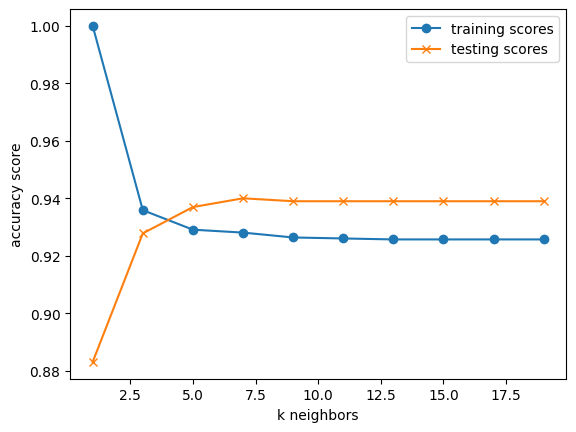

In [29]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20,2):
    knn = KNeighborsClassifier(n_neighbors=k)#, p=5)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
# Plot the results
plt.plot(range(1, 20, 2), train_scores, marker='o', label="training scores")
plt.plot(range(1, 20, 2), test_scores, marker="x", label="testing scores")
plt.xlabel("k neighbors")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

In [30]:
# Train the KNN model with the best k value
best_k_value =5
knn = KNeighborsClassifier(n_neighbors=best_k_value)
knn.fit(X_train_scaled, y_train)
print(f'k={best_k_value} Test Acc: {round(knn.score(X_test_scaled, y_test),3)}')

k=5 Test Acc: 0.937


In [31]:
knn_predict = knn.predict(X_test_scaled)

In [32]:
target_names= ['Metropolitan','Non-metropolitan' ]
print(classification_report(y_test, knn_predict,target_names=target_names))

                  precision    recall  f1-score   support

    Metropolitan       0.94      1.00      0.97       923
Non-metropolitan       0.00      0.00      0.00        60

        accuracy                           0.94       983
       macro avg       0.47      0.50      0.48       983
    weighted avg       0.88      0.94      0.91       983



In [58]:
print(confusion_matrix(y_test, knn_predict, labels = [1,2]))

[[916   2]
 [ 65   0]]


<Axes: xlabel='F_INC_SDT1', ylabel='F_AGECAT'>

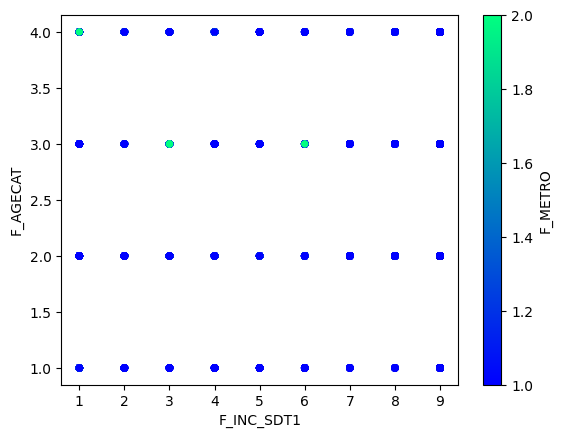

In [34]:
# Plot the data points 
subset_df.plot.scatter(
    x="F_INC_SDT1", 
    y="F_AGECAT",
    c="F_METRO", 
    colormap='winter')

not very intresting as the metro and non-metro fall on top of each other

Text(0.5, 0, 'response')

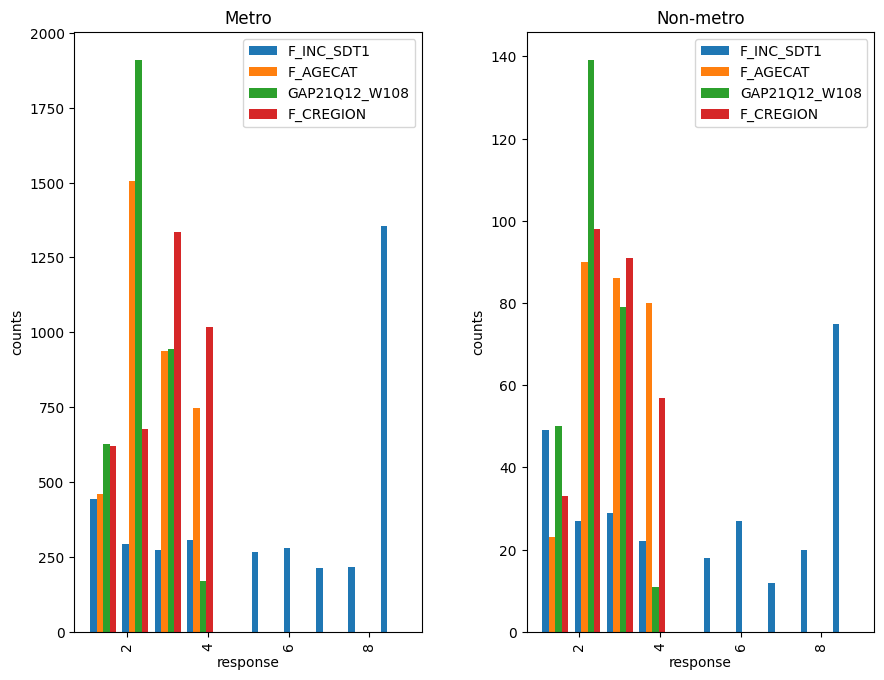

In [152]:
# plotting histograms
ax =subset_df.hist(column=['F_INC_SDT1','F_AGECAT','GAP21Q12_W108','F_CREGION'], by="F_METRO", figsize=(10, 8)
              ,legend=True)
ax[0].set_title("Metro")
ax[0].set_ylabel("counts")
ax[0].set_xlabel("response")
ax[1].set_title("Non-metro")
ax[1].set_ylabel("counts")
ax[1].set_xlabel("response")
# subset_df.hist(column=['ENV2_a_W108', 'ENV2_b_W108', 'ENKNOW1_W108', 'ENKNOW2_W108',
#        'EN1_W108', 'EVCAR2_W108', 'EVCAR2B_a_W108', 'EVCAR2B_b_W108',
#        'EVCAR2B_c_W108', 'EVCAR3_W108', 'EVCAR1_W108',], by="F_METRO", figsize=(10, 8),legend=True)

most important features appear somewhat as normal distributions expect for F_INT_SDT1 

Text(0.5, 0, 'response')

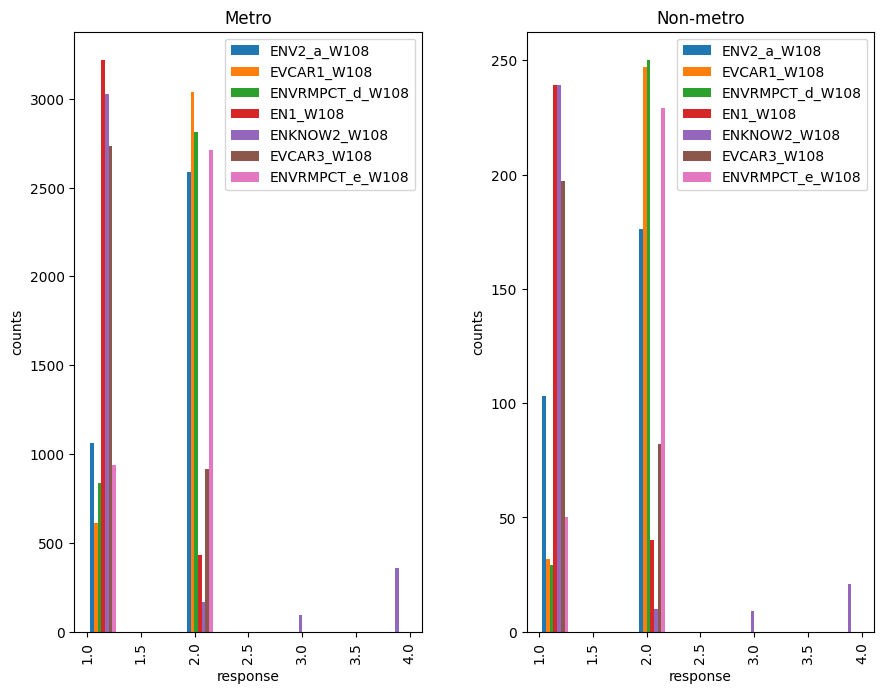

In [153]:
# plotting histograms least important features
ax=subset_df.hist(column=['ENV2_a_W108', 'EVCAR1_W108', 'ENVRMPCT_d_W108', 'EN1_W108','ENKNOW2_W108', 'EVCAR3_W108'
                       , 'ENVRMPCT_e_W108',], by="F_METRO", figsize=(10, 8),legend=True)
ax[0].set_title("Metro")
ax[0].set_ylabel("counts")
ax[0].set_xlabel("response")
ax[1].set_title("Non-metro")
ax[1].set_ylabel("counts")
ax[1].set_xlabel("response")

least important features appear to be imbalanced

In [36]:
# Create the decision tree classifier instance
treemodel = tree.DecisionTreeClassifier(criterion='gini')#  'gini', 'log_loss', 'entropy'

In [37]:
# Fit the model
treemodel = treemodel.fit(X_train_scaled, y_train)

In [38]:
# Making predictions using the testing data
tree_predictions = treemodel.predict(X_test)

In [39]:
# Calculate the accuracy score
tree_acc_score = accuracy_score(y_test, tree_predictions)

print(f"Accuracy Score : {tree_acc_score}")

Accuracy Score : 0.9389623601220752


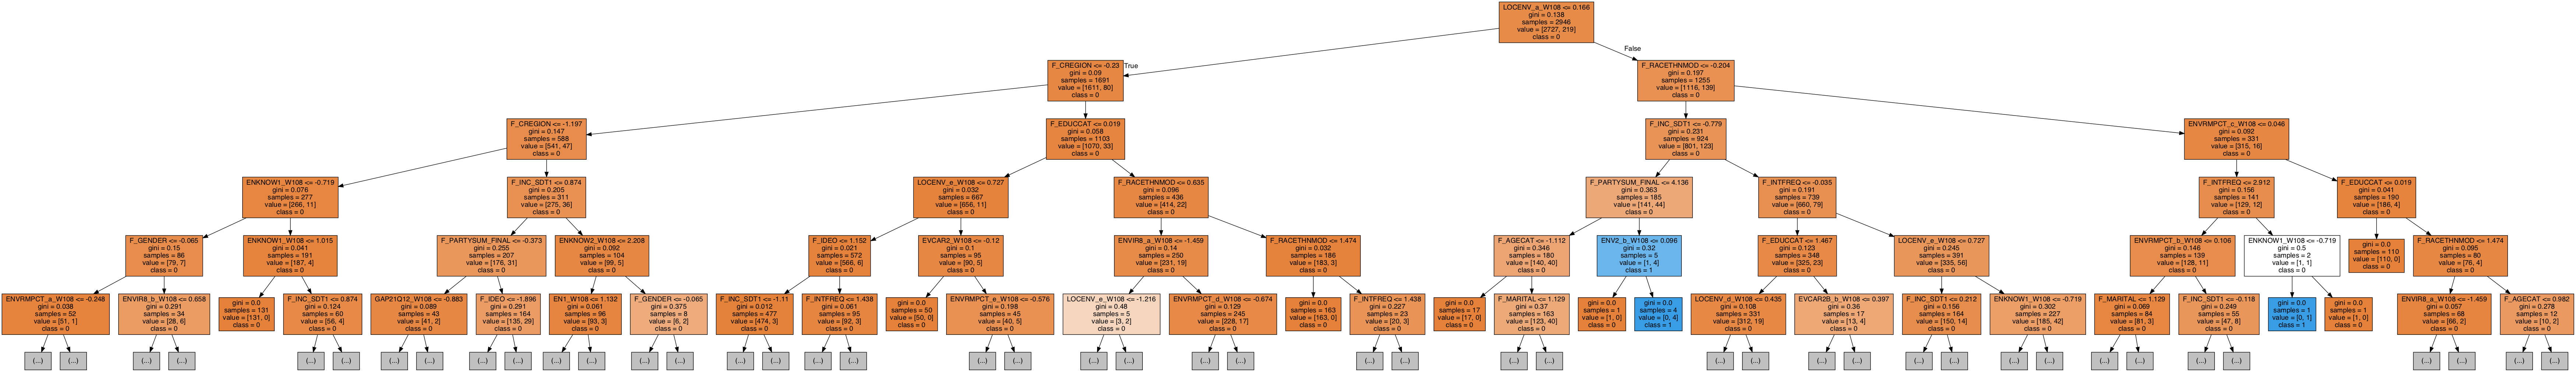

In [40]:
# Create DOT data
dot_data = tree.export_graphviz(
    treemodel, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True, max_depth=5
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

In [41]:
print(classification_report(y_test, tree_predictions, target_names=target_names))

                  precision    recall  f1-score   support

    Metropolitan       0.94      1.00      0.97       923
Non-metropolitan       0.00      0.00      0.00        60

        accuracy                           0.94       983
       macro avg       0.47      0.50      0.48       983
    weighted avg       0.88      0.94      0.91       983



In [42]:
# Train the Random Forest model
clf = RandomForestClassifier(random_state=1, n_estimators=8)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Train the Random Forest model
clf =clf.fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9826883910386965
Testing Score: 0.9379450661241099


In [45]:
# Get the feature importance array
feature_importances = clf.feature_importances_

In [46]:
# sorting features by importance
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
importances_sorted[:]

[(0.06152650132569272, 'F_INC_SDT1'),
 (0.05115903590636534, 'F_AGECAT'),
 (0.04912872618379031, 'GAP21Q12_W108'),
 (0.04841019204920649, 'F_CREGION'),
 (0.046857922315983416, 'LOCENV_e_W108'),
 (0.04486169291121607, 'LOCENV_d_W108'),
 (0.04478944597633245, 'F_IDEO'),
 (0.04227463550192325, 'ENKNOW1_W108'),
 (0.041523086964115004, 'LOCENV_a_W108'),
 (0.037015687587129906, 'F_MARITAL'),
 (0.03637599941743473, 'F_INTFREQ'),
 (0.03612955518905597, 'EVCAR2B_a_W108'),
 (0.03305567347491481, 'F_RACETHNMOD'),
 (0.03157175996550605, 'F_EDUCCAT'),
 (0.028201941398771708, 'ENVRMPCT_a_W108'),
 (0.027081855335347082, 'EVCAR2B_b_W108'),
 (0.02446911637855843, 'EVCAR2B_c_W108'),
 (0.024401143109116397, 'ENV2_b_W108'),
 (0.024047341807613393, 'ENVRMPCT_b_W108'),
 (0.022145912780853205, 'F_GENDER'),
 (0.022135445924510718, 'EVCAR2_W108'),
 (0.021767334125851523, 'ENVRMPCT_c_W108'),
 (0.02159221424258181, 'ENVIR8_e_W108'),
 (0.020896280590484043, 'ENVIR8_c_W108'),
 (0.01902508159528364, 'ENVIR8_d_W108'

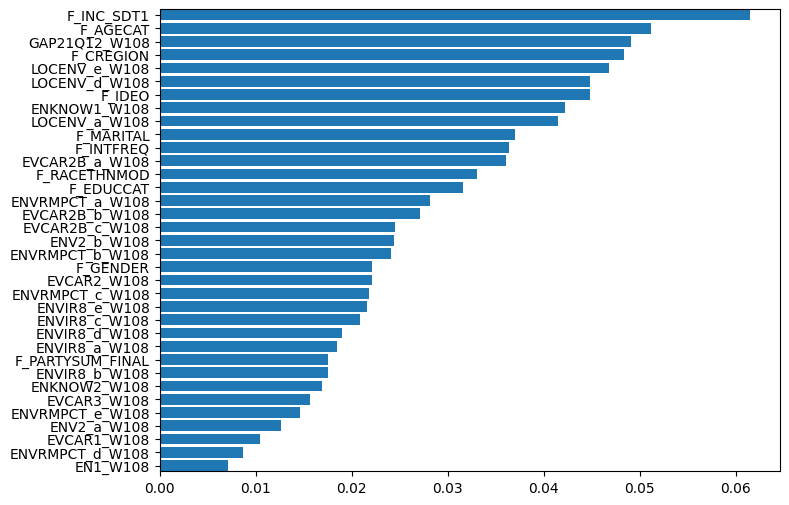

In [47]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(8,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [48]:
clf_predict = clf.predict(X_test_scaled)

In [49]:
print(classification_report(y_test, clf_predict, target_names=target_names))

                  precision    recall  f1-score   support

    Metropolitan       0.94      1.00      0.97       923
Non-metropolitan       0.33      0.02      0.03        60

        accuracy                           0.94       983
       macro avg       0.64      0.51      0.50       983
    weighted avg       0.90      0.94      0.91       983



In [88]:
# checking svc model with different kernels
for kernel in ('rbf', 'linear','sigmoid'):
    for c in (0.00001,0.0001, 0.001, 0.01, 1):
        # Create the support vector machine classifier model with a 'linear' kernel
        svcmodel = SVC(kernel=kernel, C=c,probability=True)
        svcmodel.fit(X_train, y_train)
        score = svcmodel.score(X_test, y_test)
        print( kernel, c, score)

rbf 1e-05 0.9338758901322483
rbf 0.0001 0.9338758901322483
rbf 0.001 0.9338758901322483
rbf 0.01 0.9338758901322483
rbf 1 0.9338758901322483
linear 1e-05 0.9338758901322483
linear 0.0001 0.9338758901322483
linear 0.001 0.9338758901322483
linear 0.01 0.9338758901322483
linear 1 0.9338758901322483
sigmoid 1e-05 0.9338758901322483
sigmoid 0.0001 0.9338758901322483
sigmoid 0.001 0.9338758901322483
sigmoid 0.01 0.9338758901322483
sigmoid 1 0.9338758901322483


In [51]:
# print score 
svcmodel = SVC(kernel='rbf', C=0.001)

In [52]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

In [53]:
# Fit the model to the training data
svcmodel.fit(X_train, y_train)

SVC(C=0.001)

In [54]:
# Validate the model by checking the model accuracy with model.score
print('Train Accuracy: %.3f' % svcmodel.score(X_train, y_train))
print('Test Accuracy: %.3f' % svcmodel.score(X_test, y_test))

Train Accuracy: 0.927
Test Accuracy: 0.934


In [55]:
svc_predict = svcmodel.predict(X_test_scaled)

In [56]:
print(classification_report(y_test, svc_predict, target_names=target_names))

                  precision    recall  f1-score   support

    Metropolitan       0.93      1.00      0.97       918
Non-metropolitan       0.00      0.00      0.00        65

        accuracy                           0.93       983
       macro avg       0.47      0.50      0.48       983
    weighted avg       0.87      0.93      0.90       983

